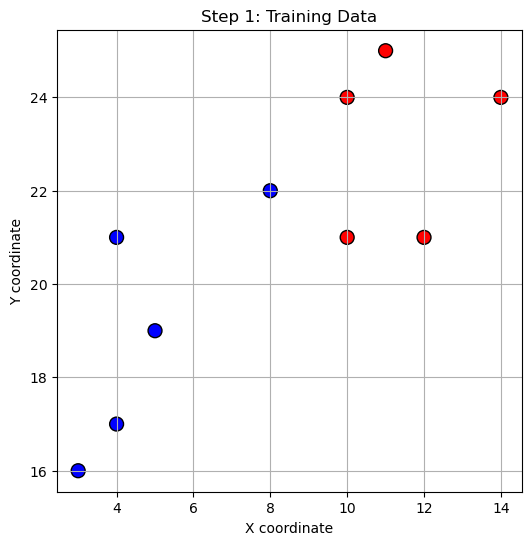

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cm
import numpy as np

# Data points
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))
newX, newY = 8, 21

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=classes, cmap='bwr', s=100, edgecolor='k')
plt.title("Step 1: Training Data")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True)
plt.show()


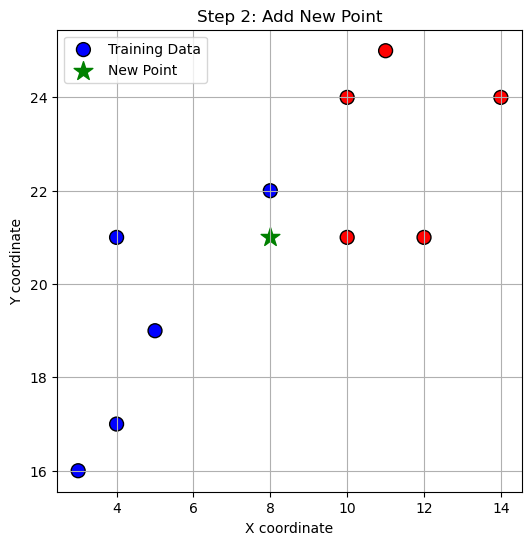

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=classes, cmap='bwr', s=100, edgecolor='k', label="Training Data")
plt.scatter([newX], [newY], c='green', s=200, marker='*', label="New Point")
plt.title("Step 2: Add New Point")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.grid(True)
plt.show()


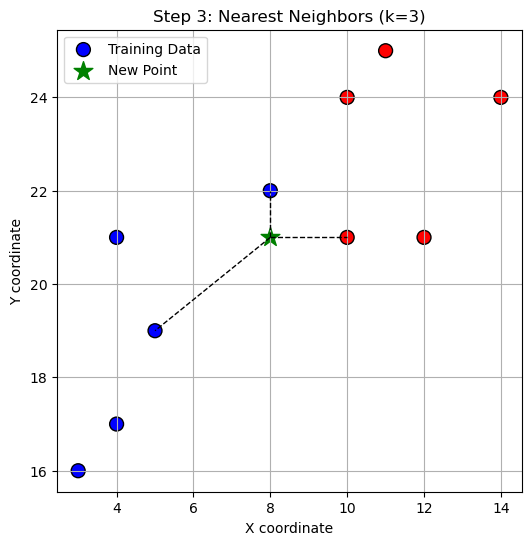

In [22]:
from math import sqrt

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data, classes)

# Show distances to all training points
distances = []
for i, (px, py) in enumerate(data):
    d = sqrt((px - newX) ** 2 + (py - newY) ** 2)
    distances.append((d, (px, py), classes[i]))

# Sort by distance and pick the 3 nearest
distances.sort(key=lambda x: x[0])
neighbors = distances[:3]

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=classes, cmap='bwr', s=100, edgecolor='k', label="Training Data")
plt.scatter([newX], [newY], c='green', s=200, marker='*', label="New Point")

# Draw lines to 3 nearest neighbors
for d, (px, py), cls in neighbors:
    plt.plot([newX, px], [newY, py], 'k--', linewidth=1)

plt.title("Step 3: Nearest Neighbors (k=3)")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.grid(True)
plt.show()


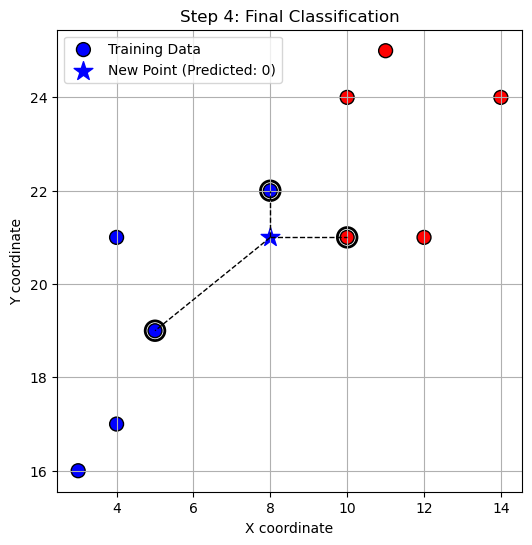

In [23]:
# Predict the class of the new point
prediction = model.predict([[newX, newY]])[0]

color_map = {0: 'blue', 1: 'red'}
point_color = color_map[prediction]

# Plot again with predicted class info
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=classes, cmap='bwr', s=100, edgecolor='k', label="Training Data")
plt.scatter([newX], [newY], c=point_color, s=200, marker='*', label=f"New Point (Predicted: {prediction})")

# Highlight the neighbors
for d, (px, py), cls in neighbors:
    plt.plot([newX, px], [newY, py], 'k--', linewidth=1)
    plt.scatter([px], [py], s=200, facecolors='none', edgecolors='black', linewidths=2)

plt.title("Step 4: Final Classification")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.grid(True)
plt.show()
